In [11]:
#given a multiple sequence alignment in fasta format, create a lookup table for every sequence id and every position in the sequence such that every gap in the MSA is not a position that is counted. for example, if we are given the sequence A that is A--G-T, the lookup table would have a value for sequence A, position 0, 1, and 2. Position 0 would correspond to A and the MSA index would be 0. position 1 would correspond to G and the MSA index would be 3. position 2 would be T and the MSA index would be 5. 

from Bio import AlignIO

msa_file = "CO1_rand100_MSA.fasta"
alignment = AlignIO.read(msa_file, "fasta")
sequences = {}
    
for record in alignment:
    subject_id = record.id
    sequence = str(record.seq).upper()
    #sequence_array = list(sequence)
    sequences[subject_id] = sequence
    
print(sequences) 

msa_dict = {}
for seq_id, sequence in sequences.items():
    msa_dict[seq_id] = {}
    ref_index = 0
    for msa_index, base in enumerate(sequence):
        if base != '-':
            msa_dict[seq_id][ref_index] = msa_index
            ref_index += 1

print(msa_dict)

{'KY454450.1': '-----------------------------ACTCGCAGGCAATCTCGCCCATGCTGGGCCTTCCGTTGACTTAACCATCTTCTCCCTCCACTTGGCCGGGGTGTCATCTATTTTAGGTGCAATTAATTTTATTACAACCATTATTAACATAAAACCCCCTGCCATCTCCCAATATCAAACACCCCTCTTTGTATGATCCGTTCTAATTACCGCAGTACTACTCCTACTATCCCTACCCGTTCTTGCCGCCGGCATCACAATACTTCTAACAGACCGAAACCTAAACACAACCTTCTTTGACCCTGCCGGAGGAGGAGACCCCATCCTTTACCAACACTTATTC-', 'MN731443.1': '-----------------------------ATTAGCTTCTAATATTTTTCACAGAGGGCCTTCAGTTGATATATCAATCTTTTCCTTACATATGGCGGGGATATCTTCAATTCTTGGGGCAATCAATTTTATCTCTACAATTATTAATATACACCATAAATCAATTTCAATGGATAAAATTCCTCTAATAGTATGATCAATTATAATTACAGCTGTTCTTCTTCTTTTATCCCTTCCTGTTTTAGCAGGGGCAATTACTATATTACTTACAGATCGAAATTTAAATACTTCATTTTTTGATCCTTCAGGAGGAGGAGACCC-----------------------', 'MH840536.1': '------------------------------------------ATCGCCCACGGCGGGTCTTCTGTAGATTTCGCTATTTTTTCATTGCATCTAGCGGGTGTTTCTTCTATTTTAGGTGCTGTTAATTTTATTACAACTGTGGTTAATATACGTAGTCCTGGTATAACCTTGGATCGAATACCCTTATTCGTGTGGTCCGTGGTAATTACAGCGGTGTTACTTTTGTTATCATTACCAGTTTTAGCAGGGGCTATCACCATAC

In [14]:
from Bio import SeqIO

blast_file = "CO1_t1_blastout.txt"
blast_dict = {}
with open(blast_file, "r") as file:
    for line in file:
        if line.startswith("#"):  # Skip comment lines
            continue
        parts = line.strip().split("\t")
        #print(parts)
        query_id = parts[0]
        subject_id = parts[1]
        subject_start = int(parts[3]) - 1  # Convert to 0-based index
        subject_end = int(parts[4]) - 1  # Convert to 0-based index
        sequence = parts[5]  # Assuming the aligned sequence is in this column
        #reference = parts[6]

        key = (query_id, subject_id)
        value = (subject_start, subject_end, sequence)
        blast_dict[key] = value

print(blast_dict)

{('query0_0', 'EU366583.1'): (3, 81, 'CTATCGGGCAATCTGGCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA'), ('query0_0', 'MH143962.1'): (15, 78, 'GCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA'), ('query0_0', 'KM287039.1'): (7, 79, 'GGCAATCTGGCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA'), ('query0_0', 'KM091919.1'): (7, 68, 'GGCAATCTGGCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGG'), ('query0_0', 'KC617168.1'): (14, 61, 'GCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTG'), ('query0_0', 'KY349784.1'): (210, 219, 'TCTTGCGGGT'), ('query0_0', 'MN870427.1'): (1, 79, 'CTATCGGGCAATCTGGCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA'), ('query0_0', 'JQ916753.1'): (197, 205, 'TTTCACTTC'), ('query0_0', 'JN294889.1'): (7, 67, 'CACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCATCTTGCGGGTATCTCATCAA'), ('query0_0', 'MH838433.1'): (62, 73, 'GCCGGAGCATCC'), ('query0_0', 'JX913889.1'): (12, 58, 'GCTCACGCCGGAGCATCCGTAGACCTGACTATTTTTTCACTTCA

In [16]:
# Create global array length of the MSA sequences
msa_coverage = [0] * len(next(iter(sequences.values())))

# Iterate over blast hits
for hit, data in blast_dict.items():
    subject_start, subject_end, sequence = data
    query_id, subject_id = hit
    for query_pos, base in enumerate(sequence): # sequence is as long as subject_end - subject_start 
        if base != '-':  # Check if base is not a gap
            msa_index = msa_dict[subject_id].pop(subject_start + query_pos, None)  # remove given msa_index from subject_id dic once it has been accounted for in coverage 
            if msa_index is not None:  # ensure msa_index exists
                msa_coverage[msa_index] += 1

print(msa_coverage)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 2, 8, 10, 10, 15, 16, 16, 16, 17, 17, 30, 31, 31, 35, 35, 35, 36, 36, 37, 44, 44, 44, 45, 45, 45, 49, 50, 51, 51, 51, 51, 51, 51, 51, 51, 52, 51, 54, 69, 70, 81, 82, 82, 82, 82, 82, 82, 82, 81, 82, 82, 81, 80, 83, 83, 83, 83, 82, 77, 82, 76, 82, 83, 82, 82, 82, 84, 84, 84, 84, 83, 83, 83, 83, 79, 79, 74, 72, 72, 73, 74, 74, 73, 74, 74, 75, 75, 75, 74, 74, 74, 74, 74, 74, 58, 53, 49, 49, 47, 46, 47, 47, 47, 47, 47, 48, 47, 46, 44, 41, 40, 31, 27, 26, 23, 17, 16, 15, 15, 15, 16, 15, 14, 14, 17, 17, 17, 16, 16, 17, 18, 18, 15, 12, 14, 14, 14, 15, 16, 16, 16, 16, 16, 16, 18, 32, 33, 32, 31, 59, 59, 59, 59, 57, 56, 56, 56, 56, 56, 57, 54, 55, 42, 40, 40, 22, 24, 24, 24, 27, 25, 25, 26, 26, 26, 24, 24, 25, 32, 35, 35, 34, 36, 35, 37, 35, 34, 31, 25, 29, 29, 29, 25, 25, 27, 27, 29, 28, 28, 33, 31, 31, 27, 26, 27, 25, 25, 25, 25, 25, 25, 25, 24, 24, 23, 23, 48, 83, 83, 83, 83, 82, 82, 82, 

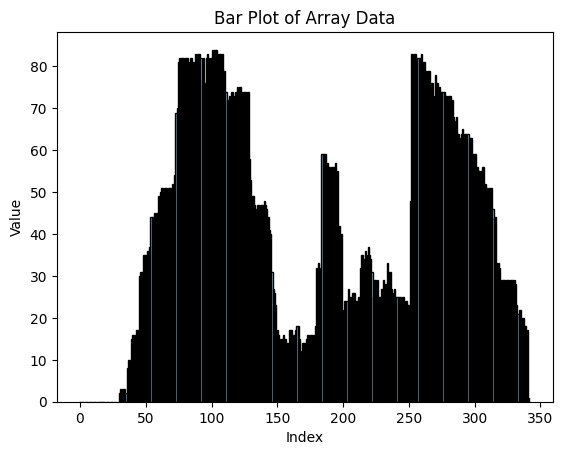

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = msa_coverage

# Indices of the array
x = np.arange(len(data))

# Create the bar plot
plt.bar(x, data, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Bar Plot of Array Data')
plt.xlabel('Index')
plt.ylabel('Value')

# Show the plot
plt.show()